<a href="https://colab.research.google.com/github/Sanjai294/Credit-card-fraud-detection-using-SMOTE/blob/main/creditcard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import  matplotlib as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.utils import resample

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/credit_data.csv")

In [ ]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [ ]:
data.shape

(284807, 31)

In [ ]:
print("Number of columns: {}".format(data.shape[1]))
print("Number of rows: {}".format(data.shape[0]))

Number of columns: 31
Number of rows: 284807


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
data.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()
data['Amount'] = sc.fit_transform(pd.DataFrame(data['Amount']))

In [ ]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [ ]:
data = data.drop(['Time'], axis =1)

In [ ]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [ ]:
data.duplicated().any()

True

In [ ]:
data = data.drop_duplicates()

In [ ]:
data.shape

(275663, 30)

In [ ]:
data['Class'].value_counts()

,count
Class,
0,275190
1,473


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [ ]:
X = data.drop('Class', axis = 1)
y=data['Class']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [ ]:
classifier = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree Classifier": DecisionTreeClassifier()
}

for name, clf in classifier.items():
    print(name)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"\n Accuaracy: {accuracy_score(y_test, y_pred)}")
    print(f"\n Precision: {precision_score(y_test, y_pred)}")
    print(f"\n Recall: {recall_score(y_test, y_pred)}")
    print(f"\n F1 Score: {f1_score(y_test, y_pred)}")

Logistic Regression

 Accuaracy: 0.9992563437505668

 Precision: 0.890625

 Recall: 0.6263736263736264

 F1 Score: 0.7354838709677419
Decision Tree Classifier

 Accuaracy: 0.9989479984764116

 Precision: 0.6666666666666666

 Recall: 0.7252747252747253

 F1 Score: 0.6947368421052632


In [ ]:
normal = data[data['Class']==0]
fraud = data[data['Class']==1]

In [ ]:
normal.shape

(275190, 30)

In [ ]:
fraud.shape

(473, 30)

In [ ]:
normal_sample = normal.sample(n=473)

In [ ]:
normal_sample.shape

(473, 30)

In [ ]:
new_data = pd.concat([normal_sample,fraud], ignore_index=True)

In [ ]:
new_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-2.235756,1.636451,-0.961715,0.163952,0.283208,-1.030894,0.476079,-0.990453,0.187379,-0.041168,...,1.022163,0.756809,-0.081965,-0.060848,-0.042255,-0.030198,-0.579378,0.219113,-0.186549,0
1,-0.180216,0.639232,-1.016693,-0.785679,1.542253,1.911561,0.092555,0.977929,-0.320982,-0.589217,...,0.059207,0.210772,0.382239,-1.154870,-1.343589,-0.035231,-0.112464,-0.009388,-0.313249,0
2,-0.250809,1.273863,1.512421,2.247118,1.050196,1.420153,0.547531,0.196514,-1.430315,1.194827,...,-0.259201,-0.494898,-0.185163,-1.355077,-0.373606,0.026897,0.226383,-0.048018,-0.342395,0
3,-0.894754,1.303768,1.267806,0.077786,-0.685437,-1.126163,0.332548,0.346576,-0.386285,-0.407975,...,-0.157284,-0.619128,0.096165,0.666615,-0.254376,0.043576,0.002116,0.055248,-0.297296,0
4,-1.633888,0.318762,0.776941,1.131219,0.345596,-1.169641,0.369027,0.001394,-0.307723,0.240353,...,0.105515,0.412008,-0.252600,0.420926,-0.243649,-0.372363,-0.094862,-0.057418,-0.191587,0


In [ ]:
new_data['Class'].value_counts()

,count
Class,
0,473
1,473


In [ ]:
X = new_data.drop('Class', axis = 1)
y= new_data['Class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
classifier = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree Classifier": DecisionTreeClassifier()
}

for name, clf in classifier.items():
    print(name)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"\n Accuaracy: {accuracy_score(y_test, y_pred)}")
    print(f"\n Precision: {precision_score(y_test, y_pred)}")
    print(f"\n Recall: {recall_score(y_test, y_pred)}")
    print(f"\n F1 Score: {f1_score(y_test, y_pred)}")

Logistic Regression

 Accuaracy: 0.9315789473684211

 Precision: 0.9587628865979382

 Recall: 0.9117647058823529

 F1 Score: 0.9346733668341709
Decision Tree Classifier

 Accuaracy: 0.9105263157894737

 Precision: 0.9207920792079208

 Recall: 0.9117647058823529

 F1 Score: 0.916256157635468


In [ ]:
X = data.drop('Class', axis = 1)
y= data['Class']

In [ ]:
importances = classifier["Decision Tree Classifier"].feature_importances_
indices = importances.argsort()[::-1]

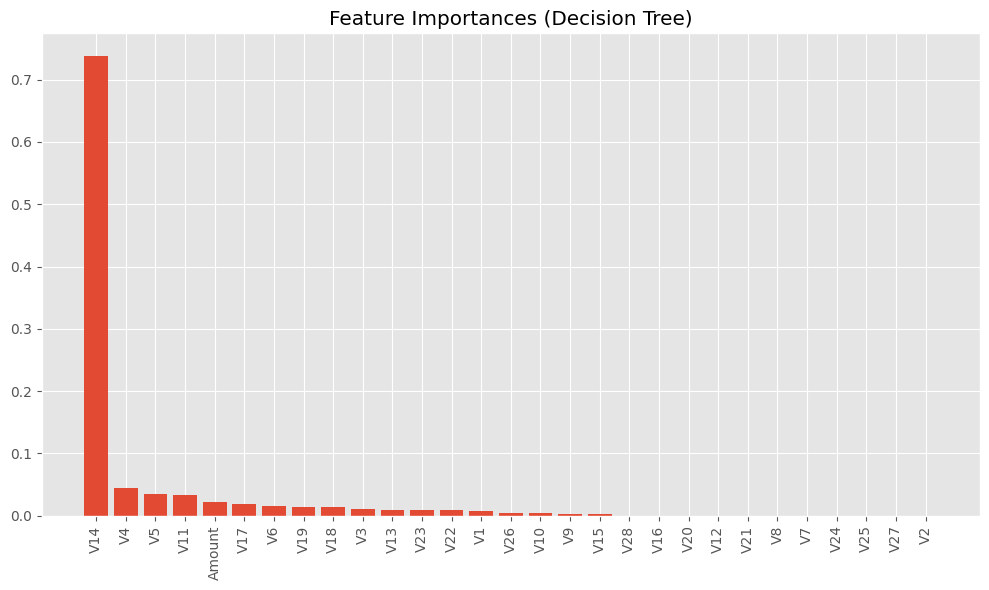

In [ ]:
plt.figure(figsize=(10, 6))
plt.title("Feature Importances (Decision Tree)")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
X.shape

(275663, 29)

In [ ]:
y.shape

(275663,)

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
X_res, y_res = SMOTE().fit_resample(X,y)

In [ ]:
X_res, y_res = SMOTE().fit_resample(X,y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.2, random_state = 42)

In [ ]:
classifier = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree Classifier": DecisionTreeClassifier()
}

for name, clf in classifier.items():
    print(name)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"\n Accuaracy: {accuracy_score(y_test, y_pred)}")
    print(f"\n Precision: {precision_score(y_test, y_pred)}")
    print(f"\n Recall: {recall_score(y_test, y_pred)}")
    print(f"\n F1 Score: {f1_score(y_test, y_pred)}")

Logistic Regression

 Accuaracy: 0.9448381118499946

 Precision: 0.9729552088770322

 Recall: 0.9150409977637584

 F1 Score: 0.9431098452198029
Decision Tree Classifier

 Accuaracy: 0.9980468040263091

 Precision: 0.9973312515885407

 Recall: 0.9987637037979746

 F1 Score: 0.9980469637098606


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm = confusion_matrix(y_test, y_pred)

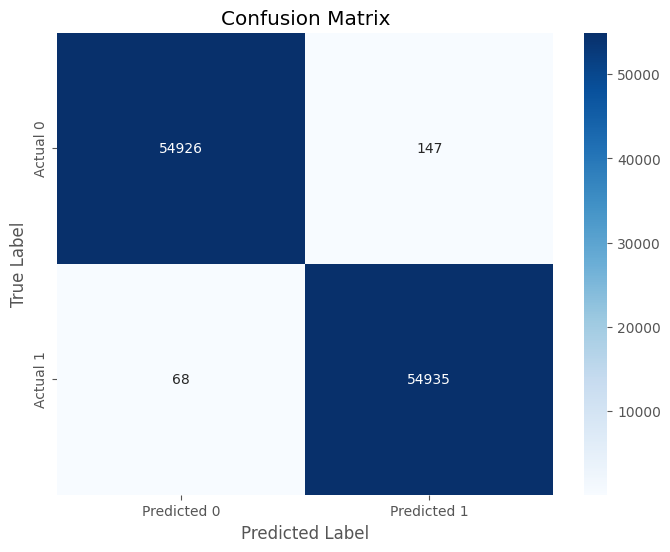

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
y_probs = clf.predict_proba(X_test)[:, 1]

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

In [ ]:
auc = roc_auc_score(y_test, y_probs)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
fig = plt.gcf()
if fig is None:
    fig = plt.figure(figsize=(8, 6))

<Figure size 640x480 with 0 Axes>

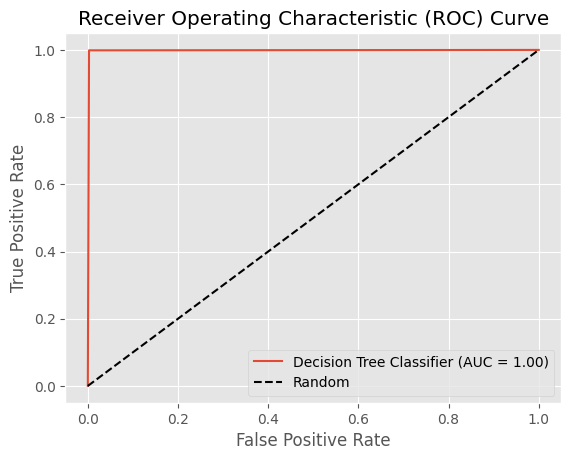

In [ ]:
plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
y_train_pred = clf.predict(X_train)

print(f"\nTraining Data:")
print(f" Accuracy: {accuracy_score(y_train, y_train_pred)}")
print(f" Precision: {precision_score(y_train, y_train_pred)}")
print(f" Recall: {recall_score(y_train, y_train_pred)}")
print(f" F1 Score: {f1_score(y_train, y_train_pred)}")

y_test_pred = clf.predict(X_test)

print(f"\nTesting Data:")
print(f" Accuracy: {accuracy_score(y_test, y_test_pred)}")
print(f" Precision: {precision_score(y_test, y_test_pred)}")
print(f" Recall: {recall_score(y_test, y_test_pred)}")
print(f" F1 Score: {f1_score(y_test, y_test_pred)}")


Training Data:
 Accuracy: 1.0
 Precision: 1.0
 Recall: 1.0
 F1 Score: 1.0

Testing Data:
 Accuracy: 0.9980468040263091
 Precision: 0.9973312515885407
 Recall: 0.9987637037979746
 F1 Score: 0.9980469637098606
